# CSIT5210 Assignment

## Spring 2019

### Instructor: Dr. Kenneth Leung (kwtleung@cse.ust.hk)

### TA: Dr. Kevin Wang (kevinw@ust.hk)


---

## [Group Signup link](https://docs.google.com/spreadsheets/d/1k523REcIAs6uo5rT0nISXjgk8R58ARvzjWE48pKQC_k/edit#gid=0)

## Description

In this assignment, you will have an opportunity to apply some data mining techniques that you learned in the class to a problem.

To get started on this assignment, you need to download the given dataset and read the description carefully written on this page. Please note that all implementation of your program should be done with Python.

You are required to form a team with at most 3 students. You and your groupmates should evenly divide the project tasks yourself. All team members are going to graded with the same score.

There are two parts in this assignment. Part 1 is a programming exercise that your groups are required to complete certain tasks using Python. You should complete your Part 1 in this jupyter notebook (.ipynb file) directly. Part 2 is a group presentation that you need to present your findings on the Task 5 of Part 1.

## Submission

| Part | Due Date | Submission by | Files to Submit |
|---|-----|------|----|
| Part 1 | 1/5/2019 (Wed) 23:59 | [email to TA](mailto:kevinw@ust.hk) | this `ipynb` file. |
| Part 2 | 7/5/2019 (Thu) during lecture | Printed hardcopy | Presentation slides (4 slides per page) |

## Prerequesite

You are recommended to install the following packages

* pandas
* geohash
* matplotlib
* sklearn

To install these packages, you shall type in your terminal

```
> pip install pandas
> pip install geohash
> pip install matplotlib
> pip install sklearn
```

The package geohash is a little tricky to install.

## About the data and the context

We are working on some data related to shared bike. There are two sets of data provided: 
* Mobike (China based data) - For Part 1 Task 1 to Task 4
* bike share (US based data) - For Part 1 Task 5 

## Download Area

You can [download the data here](https://home.cse.ust.hk/~kevinw/CSIT5210/data.zip)

There are some API and reference codes that might be useful for your assignment. [download code here](https://home.cse.ust.hk/~kevinw/CSIT5210/code.zip)

### Mobike

The data acquired from Mobike looks like the following. Apparently `orderid` is an unique ID refers to the transaction ID, `userid` refers to the registered user and `bikeid` refers to the ID of the bike. `biketype` refers to the type of the bike can be either 1 or 2. `starttime` refers to the starts of the loan. The starting location and ending location are GPS coordinates compressed in geohashed. We will let you know how to convert that back to x,y coordinates later.


In [3]:
import pandas as pd
mobikedata = pd.read_csv('mobikeData.csv', sep=',', nrows= 10, index_col= ['orderid'])
mobikedata.head(10)

,userid,bikeid,biketype,starttime,geohashed_start_loc,geohashed_end_loc
orderid,,,,,,
1893973,451147,210617,2,2017-05-14 22:16:50,wx4snhx,wx4snhj
4657992,1061133,465394,1,2017-05-14 22:16:52,wx4dr59,wx4dquz
2965085,549189,310572,1,2017-05-14 22:16:51,wx4fgur,wx4fu5n
4548579,489720,456688,1,2017-05-14 22:16:51,wx4d5r5,wx4d5r4
3936364,467449,403224,1,2017-05-14 22:16:50,wx4g27p,wx4g266
5163705,917620,509044,1,2017-05-14 22:16:53,wx4gd2e,wx4g6pw
19818,583391,3190,1,2017-05-14 22:16:54,wx4fhkk,wx4fh7q
495333,185893,67441,1,2017-05-14 22:16:53,wx4emgw,wx4emgk
2803108,15906,295614,2,2017-05-14 22:16:55,wx4f8t9,wx4f8tj


### bikeshare

The data acquired from bikeshare looks like the following. `trip_id` refers to the unique ID of a transaction. Bike rented in this system has fixed parking stations and `from_station_id` and `to_station_id` are simply referring the starting and ending location of the loan. 

There are two types of customers: **Customer** and **Subscriber**. A **Subscriber** will register with the company with more details while a **Customer** is an ad-hoc customer that does not register.

In [4]:
divvybike = pd.read_csv('bikeshareTraining.csv', sep=',', nrows = 10, index_col=['trip_id'])
divvybike.head(10)

,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
trip_id,,,,,,,,,,,
19244622,2018-07-01 00:00:03,2018-07-01 23:56:11,5429,"86,168.0",140,Dearborn Pkwy & Delaware Pl,106,State St & Pearson St,Customer,NaN,NaN
19244623,2018-07-01 00:00:13,2018-07-01 00:06:39,93,386.0,153,Southport Ave & Wellington Ave,250,Ashland Ave & Wellington Ave,Subscriber,Male,1986.0
19244624,2018-07-01 00:00:15,2018-07-01 00:23:26,2461,"1,391.0",76,Lake Shore Dr & Monroe St,301,Clark St & Schiller St,Subscriber,Female,1987.0
19244625,2018-07-01 00:00:25,2018-07-01 00:23:31,2991,"1,386.0",76,Lake Shore Dr & Monroe St,301,Clark St & Schiller St,Subscriber,Male,1986.0
19244626,2018-07-01 00:00:27,2018-07-01 00:11:23,2851,656.0,60,Dayton St & North Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1961.0
19244627,2018-07-01 00:00:35,2018-07-01 00:16:09,5980,934.0,128,Damen Ave & Chicago Ave,71,Morgan St & Lake St,Subscriber,Male,1995.0
19244628,2018-07-01 00:00:37,2018-07-01 00:10:14,3132,577.0,168,Michigan Ave & 14th St,321,Wabash Ave & 9th St,Customer,NaN,NaN
19244629,2018-07-01 00:00:55,2018-07-01 00:09:20,2281,505.0,168,Michigan Ave & 14th St,321,Wabash Ave & 9th St,Customer,NaN,NaN
19244630,2018-07-01 00:01:38,2018-07-01 00:25:25,3465,"1,427.0",229,Southport Ave & Roscoe St,324,Stockton Dr & Wrightwood Ave,Customer,NaN,NaN


## Part 1 - Programming Task

Your team are required to complete the following tasks on this Jupyter notebook. 

1. Data Preprocessing & Statistics - with Mobike Data
2. Data Clustering - with Mobike Data
3. Simple Data Visualization - with Mobike Data
4. Frequent Pattern Mining - with Mobike Data
5. Prediction - with bikeshare Data


In [46]:
# Task 1 - Data Preprocessing and Statistics
#
#
# Task 1.1 Read Mobike Data in using the API Pandas.read_csv so that the column 'starttime' is read as datetime64.
#                 Hint: use the parameter parse_dates
#                  ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#                 To make sure your code works you might want to read only the first 1000 rows and expand it later

import pandas as pd
import Geohash
from math import radians, cos, sin, asin, sqrt
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

def haversine(lon1, lat1, lon2, lat2):  # 经度1，纬度1，经度2，纬度2 （十进制度数）
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r * 1000

mobikedata = pd.read_csv('data/mobikeData.csv', sep=',', nrows=40000, index_col=['starttime'], 
                         parse_dates=['starttime'],date_parser=lambda col: pd.to_datetime(col, utc=True))
tm = pd.read_csv('data/mobikeData.csv', sep=',', nrows=40000, parse_dates=['starttime'],
                 date_parser=lambda col: pd.to_datetime(col, utc=True))

# Task 1.2 Convert the field geohashed_start_loc and geohashed_end_loc into x-y coordinate using the API Geohash.decode
#                  The package Geohash can be found from pip. You might encounter the problem 
#                   'python3.5.2 can't find the module '  ref: https://github.com/vinsci/geohash/issues/4
#                    This can be fixed very easily. Or
#                   You might directly use the fixed version of Geohash in our project package.
# Task 1.3 Create the column 'distance' based on the Euclidean distance  that the order has traveled.

#初始化列
mobikedata['startlats'] = '1'
mobikedata['startlons'] = '1'
mobikedata['endlats'] = '1'
mobikedata['endlons'] = '1'
mobikedata['distance'] = 1
for i in range(0, len(mobikedata)):
    lat1 = (Geohash.decode(mobikedata.iloc[i]['geohashed_start_loc']))[0]
    lon1 = (Geohash.decode(mobikedata.iloc[i]['geohashed_start_loc']))[1]
    lat2 = (Geohash.decode(mobikedata.iloc[i]['geohashed_end_loc']))[0]
    lon2 = (Geohash.decode(mobikedata.iloc[i]['geohashed_end_loc']))[1]
    mobikedata.iloc[i, 6] = lat1
    mobikedata.iloc[i, 7] = lon1
    mobikedata.iloc[i, 8] = lat2
    mobikedata.iloc[i, 9] = lon2
    mobikedata.iloc[i, 10] = haversine(float(lon1), float(lat1), float(lon2), float(lat2))

#  Task 1.4.1  Check the memory you have spent by the API .info()
print('Original memory usage:')
mobikedata.info()

#  Task 1.4.2  Compress the field userid bikeid using a smaller data type int32 / uint32 and the field biketype using int8
mobikedata['orderid'] = mobikedata['orderid'].astype('int32')
mobikedata['userid'] = mobikedata['userid'].astype('int32')
mobikedata['bikeid'] = mobikedata['bikeid'].astype('int32')
mobikedata['biketype'] = mobikedata['biketype'].astype('int8')

# Task 1.343 Check the memory you have spent again
print('Memory usage after compression:')
mobikedata.info()

# Task 1.4.4 Fetch the first 10 lines of your data to preview it.
display(mobikedata.head(10))

# Task 1.5  Display the count, mean, standard derviation of the int type variable and 
#                  display the earliest and latest starttime.
print()
print('orderid:')
print('Count:', mobikedata['orderid'].count(), '   Mean:', mobikedata['orderid'].mean(), '   Standard Deviation:', mobikedata['orderid'].std())

print('userid:')
print('Count:', mobikedata['userid'].count(), '   Mean:', mobikedata['userid'].mean(), '   Standard Deviation:', mobikedata['userid'].std())

print('bikeid:')
print('Count:', mobikedata['bikeid'].count(), '   Mean:', mobikedata['bikeid'].mean(), '   Standard Deviation:', mobikedata['bikeid'].std())

print('biketype:')
print('Count:', mobikedata['biketype'].count(), '   Mean:', mobikedata['biketype'].mean(), '   Standard Deviation:', mobikedata['biketype'].std())

print('starttime:')
print('earliest time:  ', tm['starttime'].min(), 'latest time:   ', tm['starttime'].max())

# Task 1.6 Find the number of order between (8am to 9am)   and the order between (1am to 2am)
#                 Note: Instead of using only the first 1000 rows, expand your selection of rows to collect enough data.
#                Hint: try the API between_time of DataFrame. 
#           ref:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.between_time.html#pandas.DataFrame.between_time
print('Between time 8AM to 9AM:')
print(mobikedata.between_time('8:00', '9:00'))
print('Between time 1AM to 2AM:')
print(mobikedata.between_time('1:00', '2:00'))


Original memory usage:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40000 entries, 2017-05-14 22:16:50+00:00 to 2017-05-13 10:33:44+00:00
Data columns (total 11 columns):
orderid                40000 non-null int64
userid                 40000 non-null int64
bikeid                 40000 non-null int64
biketype               40000 non-null int64
geohashed_start_loc    40000 non-null object
geohashed_end_loc      40000 non-null object
startlats              40000 non-null object
startlons              40000 non-null object
endlats                40000 non-null object
endlons                40000 non-null object
distance               40000 non-null float64
dtypes: float64(1), int64(4), object(6)
memory usage: 3.7+ MB
Memory usage after compression:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40000 entries, 2017-05-14 22:16:50+00:00 to 2017-05-13 10:33:44+00:00
Data columns (total 11 columns):
orderid                40000 non-null int32
userid                 40000 non-nu

,orderid,userid,bikeid,biketype,geohashed_start_loc,geohashed_end_loc,startlats,startlons,endlats,endlons,distance
starttime,,,,,,,,,,,
2017-05-14 22:16:50+00:00,1893973,451147,210617,2,wx4snhx,wx4snhj,40.1,116.29,40.1,116.29,0.000000
2017-05-14 22:16:52+00:00,4657992,1061133,465394,1,wx4dr59,wx4dquz,39.79,116.33,39.8,116.32,1402.266959
2017-05-14 22:16:51+00:00,2965085,549189,310572,1,wx4fgur,wx4fu5n,39.88,116.54,39.88,116.55,853.297650
2017-05-14 22:16:51+00:00,4548579,489720,456688,1,wx4d5r5,wx4d5r4,39.77,116.16,39.77,116.16,0.000000
2017-05-14 22:16:50+00:00,3936364,467449,403224,1,wx4g27p,wx4g266,39.96,116.39,39.96,116.38,852.301336
2017-05-14 22:16:53+00:00,5163705,917620,509044,1,wx4gd2e,wx4g6pw,39.99,116.47,39.99,116.46,851.927290
2017-05-14 22:16:54+00:00,19818,583391,3190,1,wx4fhkk,wx4fh7q,39.75,116.56,39.75,116.56,0.000000
2017-05-14 22:16:53+00:00,495333,185893,67441,1,wx4emgw,wx4emgk,39.97,116.28,39.96,116.27,1400.979121
2017-05-14 22:16:55+00:00,2803108,15906,295614,2,wx4f8t9,wx4f8tj,39.85,116.39,39.84,116.4,1401.888450



orderid:
Count: 40000    Mean: 2479907.418075    Standard Deviation: 1508823.5331415574
userid:
Count: 40000    Mean: 534897.40285    Standard Deviation: 308183.1578145961
bikeid:
Count: 40000    Mean: 261843.910125    Standard Deviation: 144960.40650835092
biketype:
Count: 40000    Mean: 1.38415    Standard Deviation: 0.48639972462708375
starttime:
earliest time:   2017-05-12 21:45:04+00:00 latest time:    2017-05-16 18:18:43+00:00
Between time 8AM to 9AM:
Empty DataFrame
Columns: [orderid, userid, bikeid, biketype, geohashed_start_loc, geohashed_end_loc, startlats, startlons, endlats, endlons, distance]
Index: []
Between time 1AM to 2AM:
Empty DataFrame
Columns: [orderid, userid, bikeid, biketype, geohashed_start_loc, geohashed_end_loc, startlats, startlons, endlats, endlons, distance]
Index: []


In [47]:
# Task 2 - Data Clustering 
#
#
# Task 2.1 Playing with the bikeshare data, create a DataFrame that contains two columns. 
#                 The first column (the index) is a time series 0:00, 0:15, 0:30, 0:45, 1:00,... 23:00, 23:15, 23:30, 23:45
#                  The second column is an integer that counts the number of order between in the interval. For example, 0:00 should contains all order happens on or after 0:00 to 0:15.
#  This task is less straight forward, at least in our solution. So let's break down a little bit.
#  Task 2.1.1 Create a list of string containing the series '0:00', '0:15', '0:30', ... '23:45' 
#                     Hint: A double loop with if-else can do the job.

index = pd.date_range(start='0:00', end='23:45', freq='15min')
list = []

for i in range(96):
    list.append(0)

series = pd.Series(list, index=index)
df = pd.DataFrame({'Count': series})
# Task 2.1.2 Count the number of orders. You might use between_time again.
bikeshareData = pd.read_csv('data/bikeshareTraining.csv', sep=',', nrows=40000, index_col=['start_time'], parse_dates=['start_time'], date_parser=lambda col: pd.to_datetime(col, utc=True))
list[0] = (bikeshareData.between_time('0:00', '0:15'))['trip_id'].count()
list[1] = (bikeshareData.between_time('0:15', '0:30'))['trip_id'].count()
list[2] = (bikeshareData.between_time('0:30', '0:45'))['trip_id'].count()
list[3] = (bikeshareData.between_time('0:45', '1:00'))['trip_id'].count()
list[4] = (bikeshareData.between_time('1:00', '1:15'))['trip_id'].count()
list[5] = (bikeshareData.between_time('1:15', '1:30'))['trip_id'].count()
list[6] = (bikeshareData.between_time('1:30', '1:45'))['trip_id'].count()
list[7] = (bikeshareData.between_time('1:45', '2:00'))['trip_id'].count()
list[8] = (bikeshareData.between_time('2:00', '2:15'))['trip_id'].count()
list[9] = (bikeshareData.between_time('2:15', '2:30'))['trip_id'].count()
list[10] = (bikeshareData.between_time('2:30', '2:45'))['trip_id'].count()
list[11] = (bikeshareData.between_time('2:45', '3:00'))['trip_id'].count()
list[12] = (bikeshareData.between_time('3:00', '3:15'))['trip_id'].count()
list[13] = (bikeshareData.between_time('3:15', '3:30'))['trip_id'].count()
list[14] = (bikeshareData.between_time('3:30', '3:45'))['trip_id'].count()
list[15] = (bikeshareData.between_time('3:45', '4:00'))['trip_id'].count()
list[16] = (bikeshareData.between_time('4:00', '4:15'))['trip_id'].count()
list[17] = (bikeshareData.between_time('4:15', '4:30'))['trip_id'].count()
list[18] = (bikeshareData.between_time('4:30', '4:45'))['trip_id'].count()
list[19] = (bikeshareData.between_time('4:45', '5:00'))['trip_id'].count()
list[20] = (bikeshareData.between_time('5:00', '5:15'))['trip_id'].count()
list[21] = (bikeshareData.between_time('5:15', '5:30'))['trip_id'].count()
list[22] = (bikeshareData.between_time('5:30', '5:45'))['trip_id'].count()
list[23] = (bikeshareData.between_time('5:45', '6:00'))['trip_id'].count()
list[24] = (bikeshareData.between_time('6:00', '6:15'))['trip_id'].count()
list[25] = (bikeshareData.between_time('6:15', '6:30'))['trip_id'].count()
list[26] = (bikeshareData.between_time('6:30', '6:45'))['trip_id'].count()
list[27] = (bikeshareData.between_time('6:45', '7:00'))['trip_id'].count()
list[28] = (bikeshareData.between_time('7:00', '7:15'))['trip_id'].count()
list[29] = (bikeshareData.between_time('7:15', '7:30'))['trip_id'].count()
list[30] = (bikeshareData.between_time('7:30', '7:45'))['trip_id'].count()
list[31] = (bikeshareData.between_time('7:45', '8:00'))['trip_id'].count()
list[32] = (bikeshareData.between_time('8:00', '8:15'))['trip_id'].count()
list[33] = (bikeshareData.between_time('8:15', '8:30'))['trip_id'].count()
list[34] = (bikeshareData.between_time('8:30', '8:45'))['trip_id'].count()
list[35] = (bikeshareData.between_time('8:45', '9:00'))['trip_id'].count()
list[36] = (bikeshareData.between_time('9:00', '9:15'))['trip_id'].count()
list[37] = (bikeshareData.between_time('9:15', '9:30'))['trip_id'].count()
list[38] = (bikeshareData.between_time('9:30', '9:45'))['trip_id'].count()
list[39] = (bikeshareData.between_time('9:45', '10:00'))['trip_id'].count()
list[40] = (bikeshareData.between_time('10:00', '10:15'))['trip_id'].count()
list[41] = (bikeshareData.between_time('10:15', '10:30'))['trip_id'].count()
list[42] = (bikeshareData.between_time('10:30', '10:45'))['trip_id'].count()
list[43] = (bikeshareData.between_time('10:45', '11:00'))['trip_id'].count()
list[44] = (bikeshareData.between_time('11:00', '11:15'))['trip_id'].count()
list[45] = (bikeshareData.between_time('11:15', '11:30'))['trip_id'].count()
list[46] = (bikeshareData.between_time('11:30', '11:45'))['trip_id'].count()
list[47] = (bikeshareData.between_time('11:45', '12:00'))['trip_id'].count()
list[48] = (bikeshareData.between_time('12:00', '12:15'))['trip_id'].count()
list[49] = (bikeshareData.between_time('12:15', '12:30'))['trip_id'].count()
list[50] = (bikeshareData.between_time('12:30', '12:45'))['trip_id'].count()
list[51] = (bikeshareData.between_time('12:45', '13:00'))['trip_id'].count()
list[52] = (bikeshareData.between_time('13:00', '13:15'))['trip_id'].count()
list[53] = (bikeshareData.between_time('13:15', '13:30'))['trip_id'].count()
list[54] = (bikeshareData.between_time('13:30', '13:45'))['trip_id'].count()
list[55] = (bikeshareData.between_time('13:45', '14:00'))['trip_id'].count()
list[56] = (bikeshareData.between_time('14:00', '14:15'))['trip_id'].count()
list[57] = (bikeshareData.between_time('14:15', '14:30'))['trip_id'].count()
list[58] = (bikeshareData.between_time('14:30', '14:45'))['trip_id'].count()
list[59] = (bikeshareData.between_time('14:45', '15:00'))['trip_id'].count()
list[60] = (bikeshareData.between_time('15:00', '15:15'))['trip_id'].count()
list[61] = (bikeshareData.between_time('15:15', '15:30'))['trip_id'].count()
list[62] = (bikeshareData.between_time('15:30', '15:45'))['trip_id'].count()
list[63] = (bikeshareData.between_time('15:45', '16:00'))['trip_id'].count()
list[64] = (bikeshareData.between_time('16:00', '16:15'))['trip_id'].count()
list[65] = (bikeshareData.between_time('16:15', '16:30'))['trip_id'].count()
list[66] = (bikeshareData.between_time('16:30', '16:45'))['trip_id'].count()
list[67] = (bikeshareData.between_time('16:45', '17:00'))['trip_id'].count()
list[68] = (bikeshareData.between_time('17:00', '17:15'))['trip_id'].count()
list[69] = (bikeshareData.between_time('17:15', '17:30'))['trip_id'].count()
list[70] = (bikeshareData.between_time('17:30', '17:45'))['trip_id'].count()
list[71] = (bikeshareData.between_time('17:45', '18:00'))['trip_id'].count()
list[72] = (bikeshareData.between_time('18:00', '18:15'))['trip_id'].count()
list[73] = (bikeshareData.between_time('18:15', '18:30'))['trip_id'].count()
list[74] = (bikeshareData.between_time('18:30', '18:45'))['trip_id'].count()
list[75] = (bikeshareData.between_time('18:45', '19:00'))['trip_id'].count()
list[76] = (bikeshareData.between_time('19:00', '19:15'))['trip_id'].count()
list[77] = (bikeshareData.between_time('19:15', '19:30'))['trip_id'].count()
list[78] = (bikeshareData.between_time('19:30', '19:45'))['trip_id'].count()
list[79] = (bikeshareData.between_time('19:45', '20:00'))['trip_id'].count()
list[80] = (bikeshareData.between_time('20:00', '20:15'))['trip_id'].count()
list[81] = (bikeshareData.between_time('20:15', '20:30'))['trip_id'].count()
list[82] = (bikeshareData.between_time('20:30', '20:45'))['trip_id'].count()
list[83] = (bikeshareData.between_time('20:45', '21:00'))['trip_id'].count()
list[84] = (bikeshareData.between_time('21:00', '21:15'))['trip_id'].count()
list[85] = (bikeshareData.between_time('21:15', '21:30'))['trip_id'].count()
list[86] = (bikeshareData.between_time('21:30', '21:45'))['trip_id'].count()
list[87] = (bikeshareData.between_time('21:45', '22:00'))['trip_id'].count()
list[88] = (bikeshareData.between_time('22:00', '22:15'))['trip_id'].count()
list[89] = (bikeshareData.between_time('22:15', '22:30'))['trip_id'].count()
list[90] = (bikeshareData.between_time('22:30', '22:45'))['trip_id'].count()
list[91] = (bikeshareData.between_time('22:45', '23:00'))['trip_id'].count()
list[92] = (bikeshareData.between_time('23:00', '23:15'))['trip_id'].count()
list[93] = (bikeshareData.between_time('23:15', '23:30'))['trip_id'].count()
list[94] = (bikeshareData.between_time('23:30', '23:45'))['trip_id'].count()
list[95] = (bikeshareData.between_time('23:45', '0:00'))['trip_id'].count()
for i in range(96):
    df.iloc[i, 0] = list[i]

# Task 2.2.1  Use K-mean algorithm to find 300 cluster centers of the coordinates obtained from  Task 1.2
#                  You may implement your own K-mean algorithm or simply adopt the API sklearn.cluster.KMeans
#                   ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
X = np.array([[40.10353, 116.28959]])
for i in range(1, len(mobikedata)):
    lattemp = mobikedata.iloc[i, 6]
    lontemp = mobikedata.iloc[i, 7]
    temp = np.array([lattemp, lontemp])
    X = np.vstack((X, temp))

kmeans = KMeans(n_clusters=300, random_state=0).fit(X)

# Task 2.2.2 Describe how many % of order has started from a cluster centers and ends at the same cluster centers.  
sum = 0
for i in range(0, len(mobikedata)):
    lattemp1 = mobikedata.iloc[i, 6]
    lontemp1 = mobikedata.iloc[i, 7]
    lattemp2 = mobikedata.iloc[i, 8]
    lontemp2 = mobikedata.iloc[i, 9]
    if(kmeans.predict([[lattemp1,lontemp1]]) == kmeans.predict([[lattemp2, lontemp2]])):
        sum += 1
        
print('%.2f%%' % (sum / 400) + ' of order has started from a cluster centers and ends at the same cluster centers')


60.76% of order has started from a cluster centers and ends at the same cluster centers


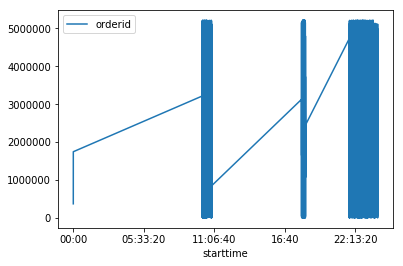

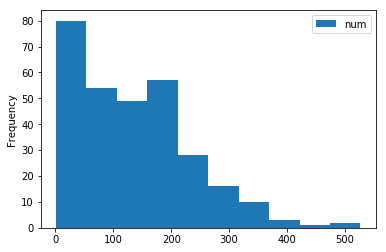

In [48]:
# Task 3 - Simple Data Visualization 
#
#
# Task 3.1 Using data obtained from Task 1.6. Plot a curveof the volume of order in different times of a day.
#                    Hint: try the API DataFrame.plot
tm = pd.read_csv('data/mobikeData.csv', sep=',', nrows=40000, parse_dates=['starttime'],
date_parser=lambda col: pd.to_datetime(col, utc=True))

for i in range(0, len(tm)):
    tm.iloc[i, 4] = tm.iloc[i, 4].time()

tm.plot(x="starttime", y="orderid", kind="line")
plt.show()

# Task 3.2 Using data obtained from Task 2.2.1. Plot a histogram of the volume of order in different cluster centers
cc = pd.DataFrame(kmeans.cluster_centers_)
cc['num'] = 0

for i in range(0,len(X)):
    cc.iloc[kmeans.predict([[X[i, 0], X[i,1]]]), 2] += 1

cc.plot(y='num', kind='hist')
plt.show()

In [56]:
# Task 4 - Frequent Pattern Mining 
#
#
# Task 4.1 Apply FPGrowth algorithm, either using existing API or write your own, to identify which set of users are likely to go-together. 
#                 Definition of go-together: they starts at the same cluster centers and their start time is in the same 15-minutes timeslot.
#                This task may not be straight forward as you may need to build the list of transaction first.

import pyfpgrowth
transList = []
listIndex = {}
tmp = 0
# transaction list contains the user_id.
for i in range(0, len(mobikedata)):
    lattemp1 = mobikedata.iloc[i, 6]
    lontemp1 = mobikedata.iloc[i, 7]
    clusterid = kmeans.predict([[lattemp1,lontemp1]]).astype(int)[0]
    datetmp = mobikedata.index[i]
    hourtmp = datetmp.hour
    mintmp = datetmp.minute
    timeid = hourtmp * 4 + mintmp / 15
    if listIndex.__contains__(clusterid * 96 + timeid):
        transList[listIndex[clusterid * 96 + timeid]].append(mobikedata.iloc[i, 1])
    else:
        listIndex[clusterid * 96 + timeid] = tmp
        tempList = [mobikedata.iloc[i, 1]]
        transList.append(tempList)
        tmp += 1

patterns = pyfpgrowth.find_frequent_patterns(transList, 2)
rules = pyfpgrowth.generate_association_rules(patterns, 0.5)

display(rules)


{(345942,): ((346777,), 1.0),
 (346777,): ((345942,), 1.0),
 (192213,): ((206634,), 0.6666666666666666),
 (206634,): ((192213,), 1.0),
 (505665,): ((940461,), 1.0),
 (770190,): ((505665,), 1.0),
 (360752,): ((414716,), 0.6666666666666666),
 (414716,): ((360752,), 1.0),
 (940461,): ((505665,), 1.0),
 (534423,): ((865612,), 1.0),
 (707979,): ((191417,), 1.0),
 (703105,): ((756187,), 1.0),
 (38957,): ((672185,), 1.0),
 (660787,): ((800798,), 1.0),
 (800798,): ((660787,), 1.0),
 (793879,): ((932185,), 1.0),
 (932185,): ((793879,), 1.0),
 (379174,): ((934973,), 1.0),
 (934973,): ((379174,), 1.0),
 (407200,): ((772925,), 1.0),
 (772925,): ((407200,), 1.0),
 (37513,): ((464392,), 0.6666666666666666),
 (464392,): ((37513,), 1.0),
 (591587,): ((766034,), 1.0),
 (766034,): ((591587,), 0.6666666666666666),
 (385933,): ((750607,), 1.0),
 (750607,): ((385933,), 1.0),
 (670705,): ((78036,), 1.0),
 (554860,): ((1030617,), 1.0),
 (1030617,): ((554860,), 0.6666666666666666),
 (918764,): ((987259,), 1.0

### Task 5 - Prediction - use bikeshare data

You are given a set of training data and 1000 rows of testing data obtained from the same city. The testing data will be 1 days to 7 days after the end of the training data. The fields `to_station_name` and `to_station_id` will be masked with the number -1 in the testing data. Your job is to predict the field `to_station_id`. 

Write a function that takes two input filenames (the training data and the testing data csv) and output a DataFrame that predict the `to_station_id`. Please note that:
* Your function may only predict 1 value for `to_station_id`; 
* The accurarcy function is defined as `total_numbers_of_match` / `total_number_of_prediction`. 
* An empty prediction would be counted as one wrong prediction.
* You are allowed to use any external data (e.g. weather, map, etc..) for your prediciton. However, this set of data are taken from bikeshare and you are not allowed to lookup the data from the internet.
* **A higher accuracy does not immediate imply a higher mark for the project. We value more on how you choose your algorithm and how you fine tune your parameters.**



We provide you a reference code (`knn3.py`) written by some Chinese programmer/data scientist that work on the Mobike data. 


In [1]:
# Task 5 Code goes here

## Part 2 - Group Presentation

Prepare a 5 minutes presentation on your Task 5 prediction work. You will be given another set of training set, testing set of you Task 5 **on 2/5/2019**. Compute the accuracy yourself and include it in your presentation. Your presentation should be focus on why would your choose that particular algorithm and what optimization/fine tuning you have done to improve the accuracy. You can also comment on your accuracy and suggest how could that be improved. 

You may use the following line to measure the accurarcy
```
groundtruth['predict'] = output['to_station_id']
groundtruth[ groundtruth['predict'] == groundtruth['to_station_id']].count()
```

Since this is a short presentation, you may assign any member to present the work.

**Note: Again, a higher accuracy does not immediate imply a higher mark.**